In [1]:
#imports
import pandas as pd 
import plotly as pl
import plotly.express as px
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# TASK 1 : import dataset
DATA = pd.read_csv("mammographic_masses_data.csv")


In [3]:
# TASK 2 : Plotting data


#Creating heatmap for features that aren't nominal
data_subset = DATA[["BA", "Age", "Density", "Severity"]]


corr_matrix = data_subset.corr()

fig = px.imshow(corr_matrix, 
                labels=dict(x="Features", y="Features", color="Correlation"),
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                color_continuous_scale='RdBu',
                zmin=-1, zmax=1, text_auto = True,
                title = "Correlation Heatmap of All Ordinal/Numerical Features")

fig.show()

# Use the .map function to create a severity column with appropriate names, which helps to make the scatter plot more understandable
DATA['Severity_Label'] = DATA['Severity'].map({0: 'Benign', 1: 'Malignant'})
fig2 = px.box(DATA, x='Severity_Label', y='Age', color='Severity_Label',
             title="Box Plot of Age by Severity of Tumor (Benign vs Malignant)",
             labels={"Severity_Label": "Tumor Severity", "Age": "Patient Age"},
                color_discrete_map={'Benign': 'blue', 'Malignant': 'red'})
fig2.show()



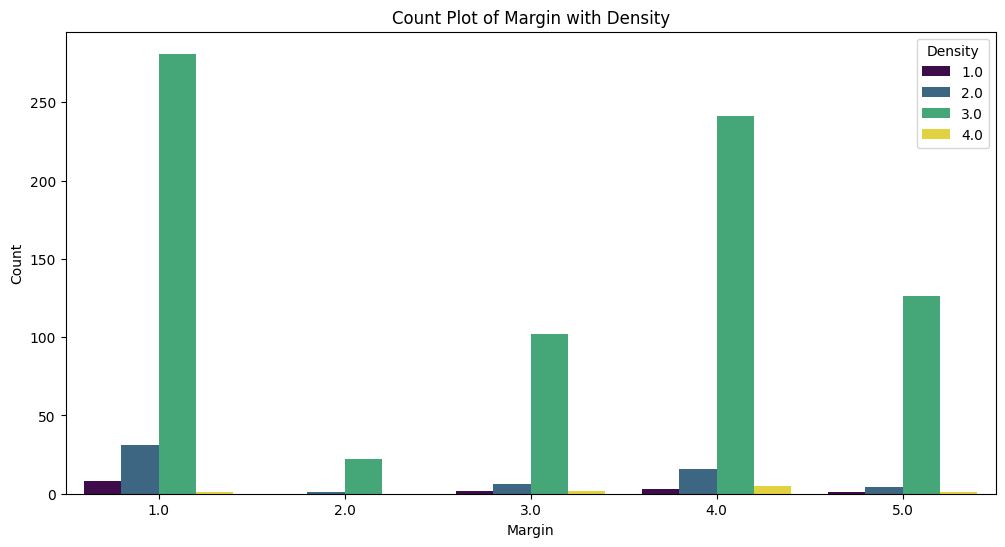

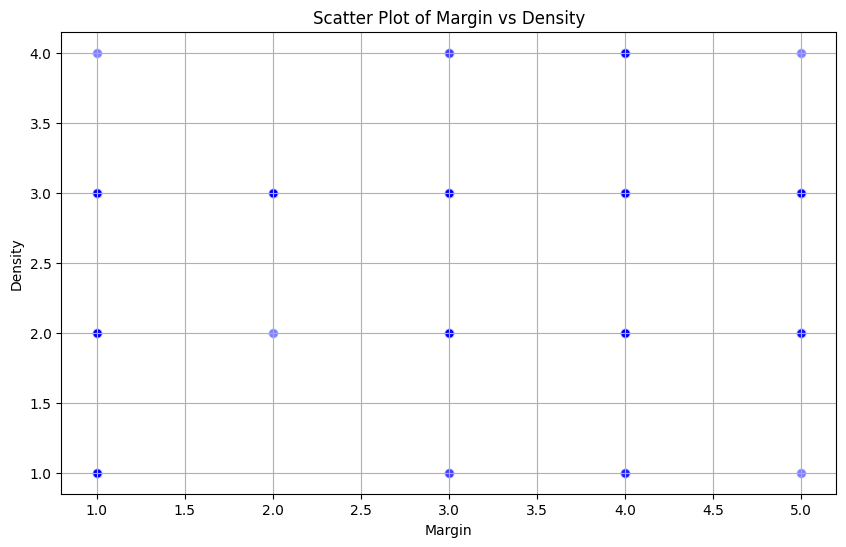

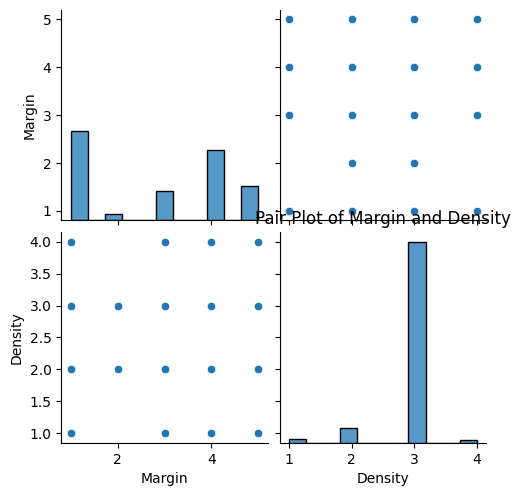

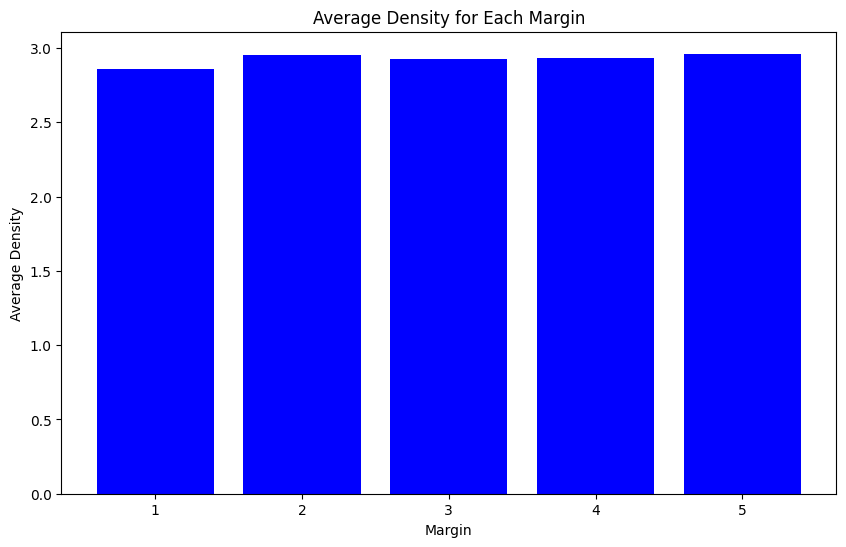

/var/folders/gc/9ml3w_r92xn0tsh3p0k69h8m0000gn/T/ipykernel_73620/1184402046.py:49: FutureWarning:

Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.



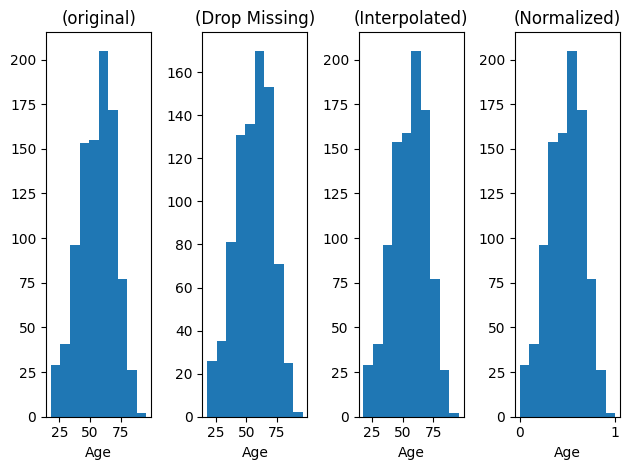

In [4]:
# TASK 3 : data preprocessing
cDATA = DATA.copy()

plt.figure(figsize=(12, 6))
sns.countplot(data=DATA, x='Margin', hue='Density', palette='viridis')
plt.title('Count Plot of Margin with Density')
plt.xlabel('Margin')
plt.ylabel('Count')
plt.legend(title='Density')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(DATA['Margin'], DATA['Density'], alpha=0.5, color='blue', edgecolors='w', s=50)
plt.title('Scatter Plot of Margin vs Density')
plt.xlabel('Margin')
plt.ylabel('Density')
plt.grid(True)
plt.show()

sns.pairplot(DATA[['Margin', 'Density']])
plt.title('Pair Plot of Margin and Density')
plt.show()  

# Aggregate data
agg_data = DATA.groupby('Margin')['Density'].mean().reset_index()

# Plot the aggregated data
plt.figure(figsize=(10, 6))
plt.bar(agg_data['Margin'], agg_data['Density'], color='blue')
plt.title('Average Density for Each Margin')
plt.xlabel('Margin')
plt.ylabel('Average Density')
plt.show()

# TASK 3.1
fig, plot = plt.subplots(1, 4)
plot[0].hist(cDATA["Age"])
plot[0].set_title("(original)")
plot[0].set_xlabel("Age")

dropMissing = cDATA.dropna()

plot[1].hist(dropMissing["Age"])
plot[1].set_title("(Drop Missing)")
plot[1].set_xlabel("Age")

# CLEANING : fill missing values using the most probable value using linear interpolation
for column in cDATA.columns.to_list():
    cDATA[column].interpolate(method='linear', inplace=True)

plot[2].hist(cDATA["Age"])
plot[2].set_title("(Interpolated)")
plot[2].set_xlabel("Age")


# TASK 3.2
# NORMALIZATION : min-max normalization on the Age column
cDATA['Age'] = (cDATA['Age'] - cDATA['Age'].min()) / (cDATA['Age'].max() - cDATA['Age'].min()) 
# we could also use normalization on ordinal parameters such as BA and Density
do_normalize_ordinal = False
for column in ["Density"]:
    if do_normalize_ordinal: cDATA[column] = (cDATA[column] - cDATA[column].min()) /(cDATA[column].max() - cDATA[column].min())


plot[3].hist(cDATA["Age"])
plot[3].set_title("(Normalized)")
plot[3].set_xlabel("Age")

plt.tight_layout()
plt.show()



Index(['Shape', 'Margin', 'Severity'], dtype='object')
[[3. 5. 1.]
 [1. 1. 1.]
 [4. 5. 1.]
 ...
 [4. 5. 0.]
 [4. 5. 1.]
 [3. 3. 0.]]
Scores for each feature: [23.31798435 50.76704805 59.44434816  5.31017132 99.65071763]


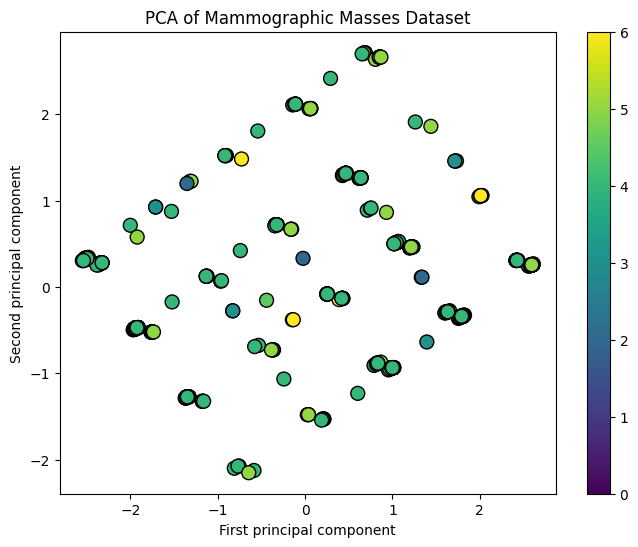

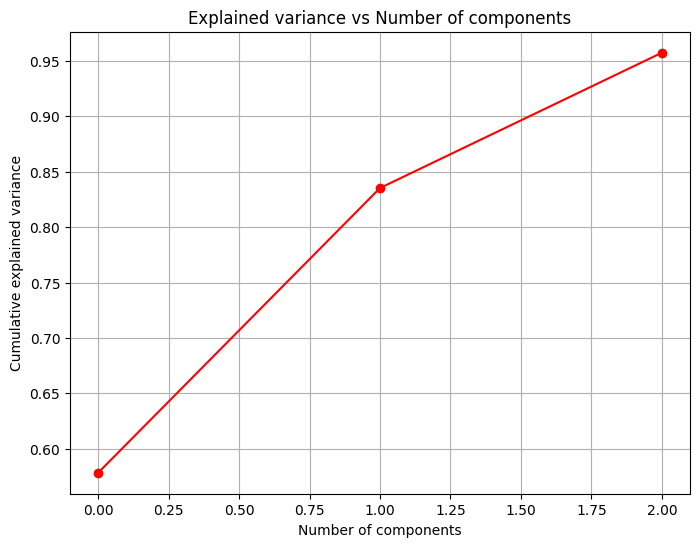

In [29]:
import numpy as np
# TASK 4 : data feature engineering (//nog niet klaar)

# TASK 4.1
# AUTOMATIC FEATURE SELECTION : using univariate feature selection (for a classification problem)
y = cDATA["BA"]
features = ["Age", "Shape", "Margin", "Density", "Severity"]
x = cDATA[features]

make_selection = SelectKBest(score_func=f_classif, k=3)
selected_x = make_selection.fit_transform(x, y)

selected_feature_mask = x.columns[make_selection.get_support()]

# What features got selected
print(selected_feature_mask)

# New table with selected features
print(selected_x)

# Scores of the features
print("Scores for each feature:", make_selection.scores_)


# TASK 4.2 
# PCA Dimensionality Reduction 
pca = sk.decomposition.PCA(n_components=3)

x_pca = pca.fit_transform(x)


plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA of Mammographic Masses Dataset')
plt.colorbar()
plt.show()


# TASK 4.3
# Truncated SVD

svd = sk.decomposition.TruncatedSVD(n_components=3)
x_svd = svd.fit_transform(x)

explained_variance = svd.explained_variance_ratio_
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='-', color='r')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance vs Number of components')
plt.grid(True)
plt.show()






